### Exploration et transformation de données ( Les utilisateurs d'Airbnb aux États-Unis)

#### Contexte:

Depuis 2008, les invités et les hôtes utilisent Airbnb pour élargir leurs possibilités de voyage et présenter une manière unique et personnalisée de découvrir le monde. Aujourd'hui, Airbnb est devenu un service unique qui est utilisé et reconnu par le monde entier. L'analyse des données sur des millions d'annonces fournies via Airbnb est un facteur crucial pour l'entreprise.  

##### Inspiration ?  
Ces millions d'annonces génèrent beaucoup de données - des données qui peuvent être analysées et utilisées pour la sécurité, les décisions commerciales, la compréhension du comportement et des performances des clients et des hôtes sur la plate-forme, l'orientation des initiatives marketing, la mise en œuvre de services supplémentaires innovants et beaucoup plus.

#### Objectif du projet :

Dans ce projet, nous analyserons les données de training, puis appliquerons une transformation aux données d'entraînement, comme la transformation du type d'entité, le remplacement des valeurs manquantes, la correction / suppression des valeurs aberrantes et la normalisation / normalisation des données. À la fin du projet, nous appliquons les mêmes transformations effectuées sur les données de traing aux données de test.

#### Note: 
Dans ce Notebook, nous travaillons sur l'EDA et dans le 2ème Notebook nous travaillons sur la transformation des données

### Cycle d'EDA

> 1. Importer les bibliothèques et charger les données
> 2. Analyser les valeurs manquantes 
> 3. Analyser la distribution de la variable cible country_destination
> 4. Analyser les variables numériques et catégorielles
> 5. Relation entre les descripteurs 
> 6. Corrélation entre les différentes variables numériques
> 7. Générer un rapport de profil
> 8. Conclusion

### 1) Importer les bibliothèques et charger les données

In [1]:
# Importer les Bibliothèques
from __future__ import print_function
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# description du projet
# https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data

# lecture de la base données
df_train = pd.read_csv('train_users_2 - train_users_2.csv')
df_train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
# Afficher les informations sur la base de données, y compris le shape, le type et le nom de descripteur de chaque colonne, 
# les valeurs non nulles et l'utilisation de la mémoire.
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [4]:
# Compter le nombre des valeurs uniques pour chaque descripteur
df_train.nunique()

id                         213451
date_account_created         1634
timestamp_first_active     213451
date_first_booking           1976
gender                          4
age                           127
signup_method                   3
signup_flow                    17
language                       25
affiliate_channel               8
affiliate_provider             18
first_affiliate_tracked         7
signup_app                      4
first_device_type               9
first_browser                  52
country_destination            12
dtype: int64

Comme nous pouvons le voir,  les valeurs de descripteur $id$ sont des identifiants uniques pour chaque utilisateur. Je propose de le supprimer, car elle ne donne pas d'informations utiles dans l'analyse de exploratoire.

In [5]:
# Drope 'id'
df_train = df_train.drop(columns=["id"], axis = 1)

In [6]:
# Décrire toutes les propriétés statistiques de la base de données 
df_train.describe()

,timestamp_first_active,age,signup_flow
count,2.134510e+05,125461.000000,213451.000000
mean,2.013085e+13,49.668335,3.267387
std,9.253717e+09,155.666612,7.637707
min,2.009032e+13,1.000000,0.000000
25%,2.012123e+13,28.000000,0.000000
50%,2.013091e+13,34.000000,0.000000
75%,2.014031e+13,43.000000,0.000000
max,2.014063e+13,2014.000000,25.000000


le descripteur "timestamp_first_active" n'est pas important à voir dans le résultat. Cependant, nous notons que std et la valeur max du descripteur "âge" sont suspectées, car le max de l'age (2014) est représent une année et pas un valeur d'âge.

### 2) Valeurs manquantes

In [7]:
# Le Total des valeurs manquantes pour chaque variable
df_train.isnull().sum()

date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [8]:
# Ici, nous allons vérifier le pourcentage de valeurs NAN présentes dans chaque variable
features_nan = [features for features in df_train.columns if df_train[features].isnull().sum()>1]
 
# Afficher le nom de la variable et le pourcentage de valeurs manquantes
for feature in features_nan:
    print(feature,': ',np.round(df_train[feature].isnull().mean()*100, 2),'% missing values', '\n')  

date_first_booking :  58.35 % missing values 

age :  41.22 % missing values 

first_affiliate_tracked :  2.84 % missing values 



On remarque la présence de valeurs manquantes dans 3 descripteurs; date_first_booking a plus de "58%" de valeurs manquantes, puis l'âge de "41%", et first_affiliate_tracked a le moins de valeurs manquantes "2,84%"

<AxesSubplot:>

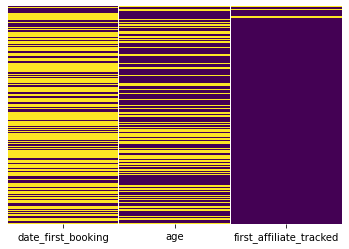

In [9]:
# l'emplacement des valeurs manquantes par Seaborn 
sns.heatmap(df_train[features_nan].isnull(), yticklabels=False, cbar=False, cmap= 'viridis')

D'un point de vue visuel, on remarque que la distribution des valeurs manquantes sont aléatoire dans le dataframe pour les descripteurs date_first_booking et age.

Dans l'étape de prétraitement, nous validerons le type de valeurs manquantes dans ces descripteurs (MCAR ou MAR ou NMAR).

### 3) Analyse de la distribution de la variable cible country_destination

In [10]:
# Pourcentage par catégorie pour la variable cible.
pourcentage_labels = df_train['country_destination'].value_counts(normalize = True) * 100
for por in pourcentage_labels.index:
    print("Pourcentage de", por,round(pourcentage_labels[por],2), "%")

Pourcentage de NDF 58.35 %
Pourcentage de US 29.22 %
Pourcentage de other 4.73 %
Pourcentage de FR 2.35 %
Pourcentage de IT 1.33 %
Pourcentage de GB 1.09 %
Pourcentage de ES 1.05 %
Pourcentage de CA 0.67 %
Pourcentage de DE 0.5 %
Pourcentage de NL 0.36 %
Pourcentage de AU 0.25 %
Pourcentage de PT 0.1 %


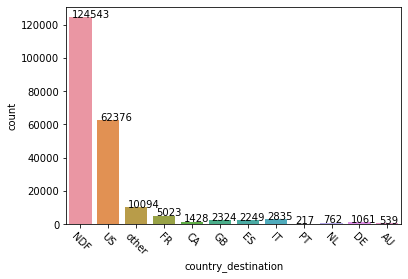

In [11]:
# Tracer la distribution de country_destination dans un hist-bar
ax = sns.countplot(x='country_destination', data=df_train)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=-45)
plt.rcParams["figure.figsize"] = (25,5)
plt.show()

À partir de ce graphique,on remarque que la plupart des demandes de réservation sont pour la destination USA, et le NDF (signifie qu'il n'y avait pas de réservation officielle), le reste des demandes sont partagés entre FR, CA GB, other, ...,etc. De plus, suite à ces résultats on en déduit que les données sont déséquilibrées.

### 4) Analyse de la distribution des variables numériques / catégorielles

In [12]:
# les Variables Numériques
feature_numeric = [feature for feature in df_train.columns if df_train[feature].dtype != "O" 
                   and feature != 'timestamp_first_active']
feature_numeric

['age', 'signup_flow']

In [13]:
# fonction d'histogramme
def hist_plot(df_train, colonne):
#     ax = sns.FacetGrid(df_train, col = "country_destination", height=10)
    ax.map(sns.distplot, colonne, bins = 25)
    plt.show()
    

#### Age

<AxesSubplot:xlabel='age', ylabel='Density'>

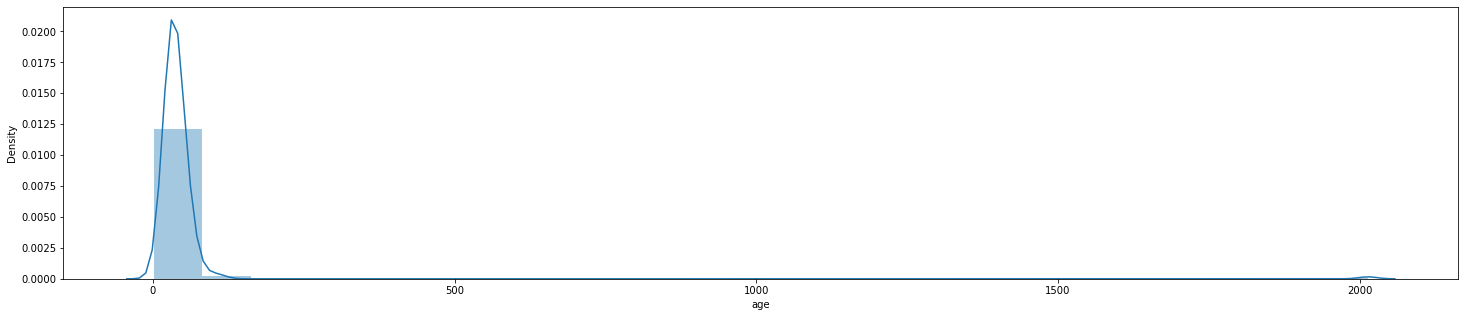

In [14]:
#  Age histogram
sns.distplot(df_train['age'].astype(float), bins = 25)

On remarque la présence des valeurs extremes (age > 2000 !!)

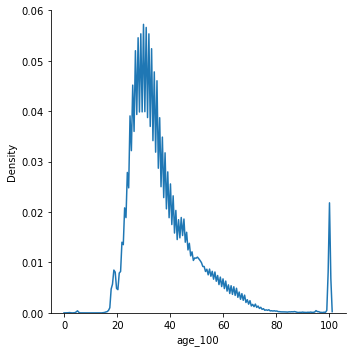

In [15]:
# tracer un histogramme 
# Si age > 100 remplacer les valeurs éxtremes par 100 pour eviter le plot des outliers
df_manip = df_train.copy()
df_manip['age_100'] = df_train['age'].map(lambda x: 100 if x > 100 else x) 
sns.displot(df_manip, x="age_100", kind="kde", bw_adjust=.25)

Nous voyons que cette distribution est parfaitement asymétrique à droite. 

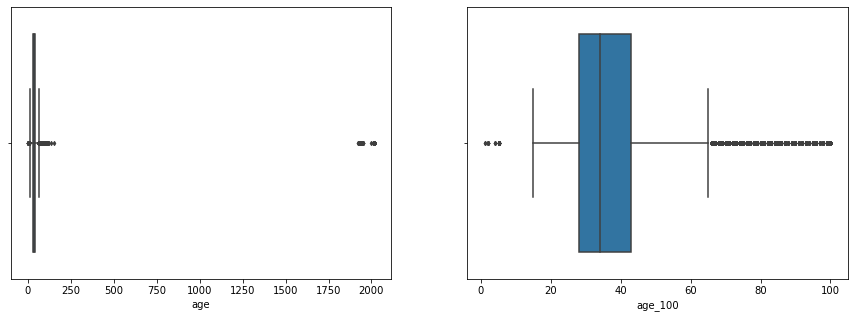

In [16]:
# age boxplot
fig, ax =plt.subplots(1,2)
sns.boxplot(x=df_train["age"], ax=ax[0], fliersize= 3)
sns.boxplot(x=df_manip['age_100'], ax=ax[1], fliersize= 3)
fig.set_size_inches(15, 5)
fig.show()

Dans le 1er boxplot, nous remarquons la présence de valeurs aberrantes (âge> 2000), et dans la deuxième boxplot nous remarquons des demandes de réservation faites par des enfants (-18), et nous considérons ces demandes comme des valeurs aberrantes.

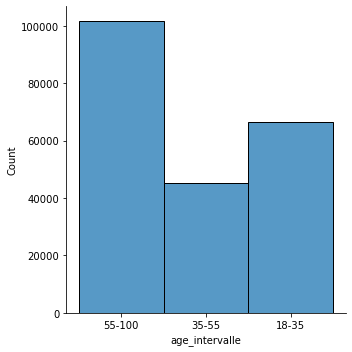

In [17]:
# classification de l'age dans des intervalles

df_manip['age_intervalle'] = df_manip["age_100"].map(lambda x: '18-35' if x < 35 
                                                     else( '35-55' if x<55 else '55-100'))
sns.displot(df_manip['age_intervalle'], bins = 25)

In [18]:
df_manip['age_intervalle'].value_counts()

55-100    101642
18-35      66529
35-55      45280
Name: age_intervalle, dtype: int64

On remarque que, la plupart des demandes de réservation Airbnb sont effectuées par des personnes de 55 ans et de plus.

#### signup_flow

<AxesSubplot:xlabel='signup_flow', ylabel='Density'>

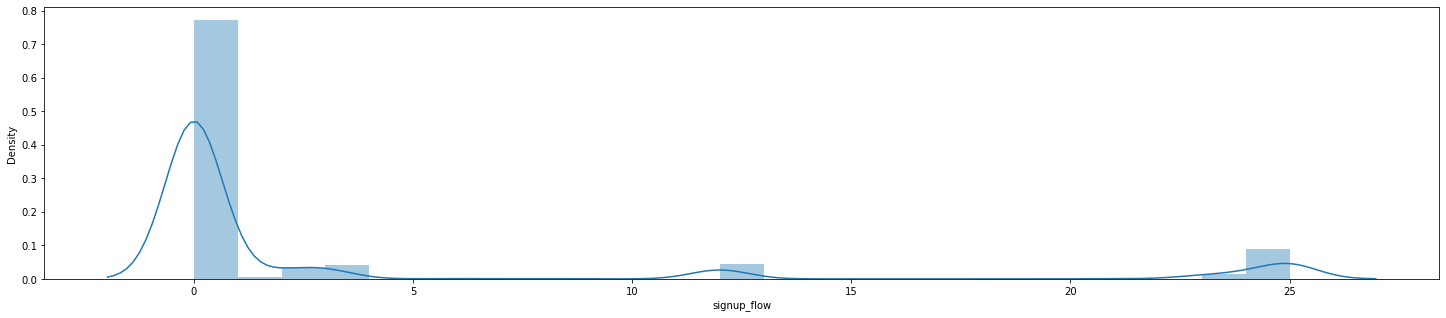

In [19]:
# signup_flow histogram
sns.distplot(df_train['signup_flow'].astype(float), bins = 25)

signup_flow: la page à partir de laquelle un utilisateur s'est inscrit.

On remarque que, la Distribution est non-normal

#### timestamp_first_active

In [20]:
from datetime import datetime as dt

# Formater la date "timestamp_first_active" et extraire le mois l'année la semaine
df_manip['date'] = pd.to_datetime(df_train['timestamp_first_active'], format='%Y%m%d%H%M%S')
df_manip['annee'] = df_manip['date'].dt.year
df_manip['semaine'] = df_manip['date'].dt.week
df_manip['mois'] = df_manip['date'].dt.month

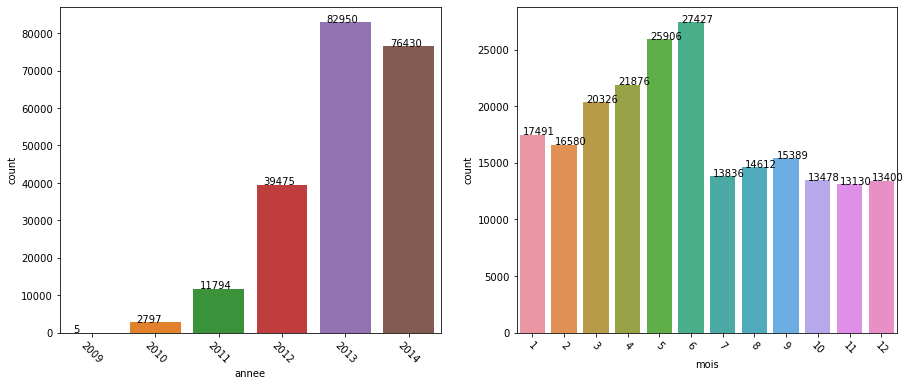

In [21]:
# plot-bar pour les demandes dans les années et les mois 
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
ax = sns.countplot(x='annee', data=df_manip)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=-45)
plt.rcParams["figure.figsize"] = (20,8)

plt.subplot(1, 2, 2)
ax = sns.countplot(x='mois', data=df_manip)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=-45)
plt.rcParams["figure.figsize"] = (20,8)

Les années de la première activité de la plupart des utilisateurs est au tour des années 2013-2014

La plupart des réservations sont effectuées au cours des 6 premiers mois et bien plus en mai et juin

### 5) Relation entre les descripteurs 

In [22]:
# fonction pour la représentation graphique en bar pour un descripteur en fonction de la cible
def plot_bar(data, feature_1, feature_2):
    df_data = data.copy()
    total_len = len(data[feature_1])
    sns.set()
    fig = plt.figure(figsize=(20,8))
    ax = sns.countplot(df_data[feature_2],hue=df_data[feature_1]).set_title(" Distribution des réservation basés sur:  " +feature_1)
    ax = plt.gca()
    for p in ax.patches:
        height = p.get_height()
    sns.set(font_scale=1.5)
    ax.set_xlabel(feature_2)
    ax.set_ylabel("Nombre d'enregistrements")
    plt.show()

#### Relation annee / gender

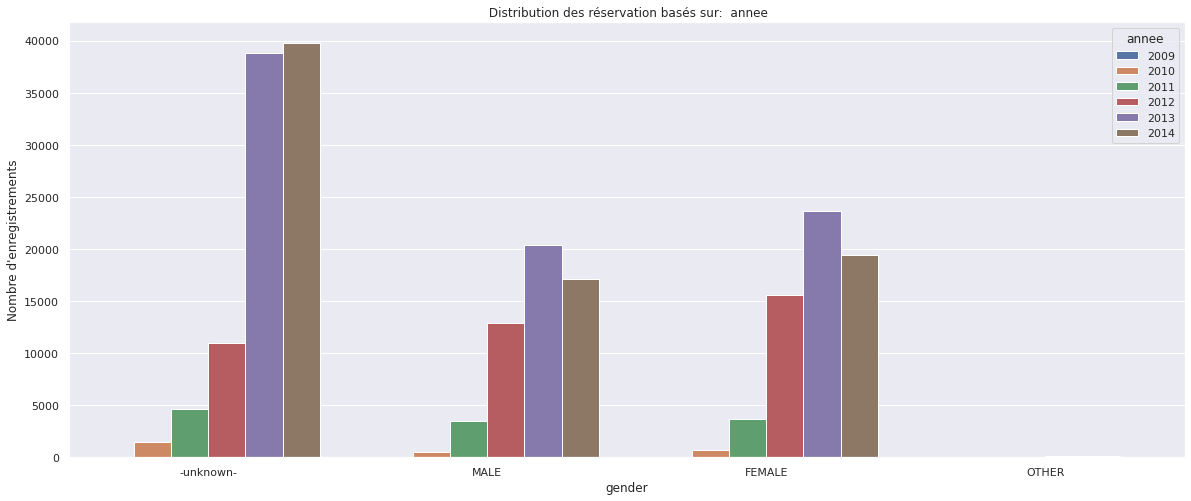

In [23]:
# Appel de la fonction plot_bar et tracer le diagramme bar pour les descripteurs annee/gender
plot_bar(df_manip, 'annee', 'gender')

Pendant toutes les années, les femmes réservent plus à airbnb que les hommes. De plus, les réservations par le sexe inconnu sont  plus que les réservations des deux sexes (H/F)

#### Relation country_destination / gender

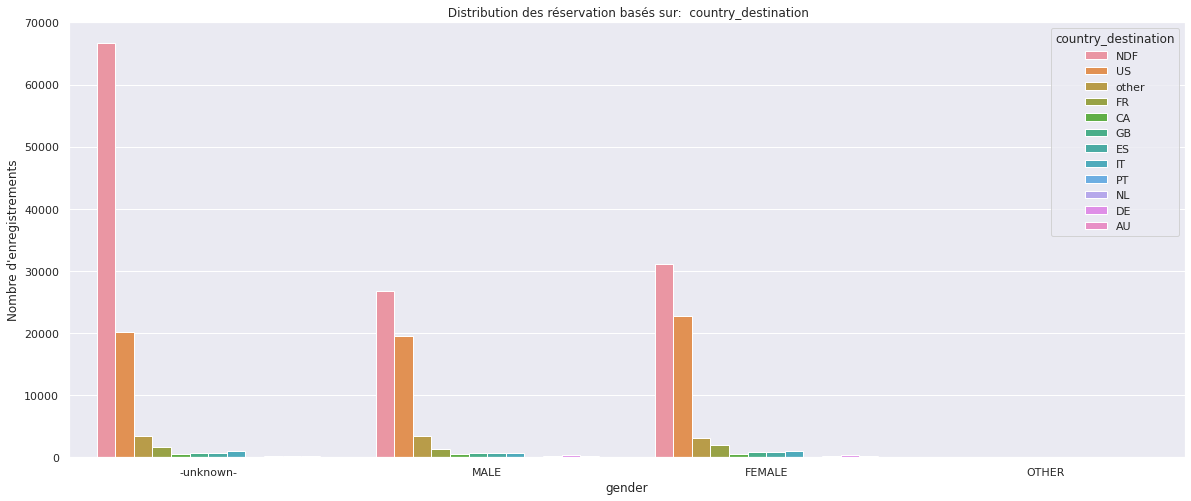

In [24]:
# Appel de la fonction plot_bar et tracer le diagramme de bar pour les descripteur country_destination / gender
plot_bar(df_manip, 'country_destination', 'gender')

La réservation vers une destination américaine est la plus populaire entre le sexe H/F et le sexe inconnu

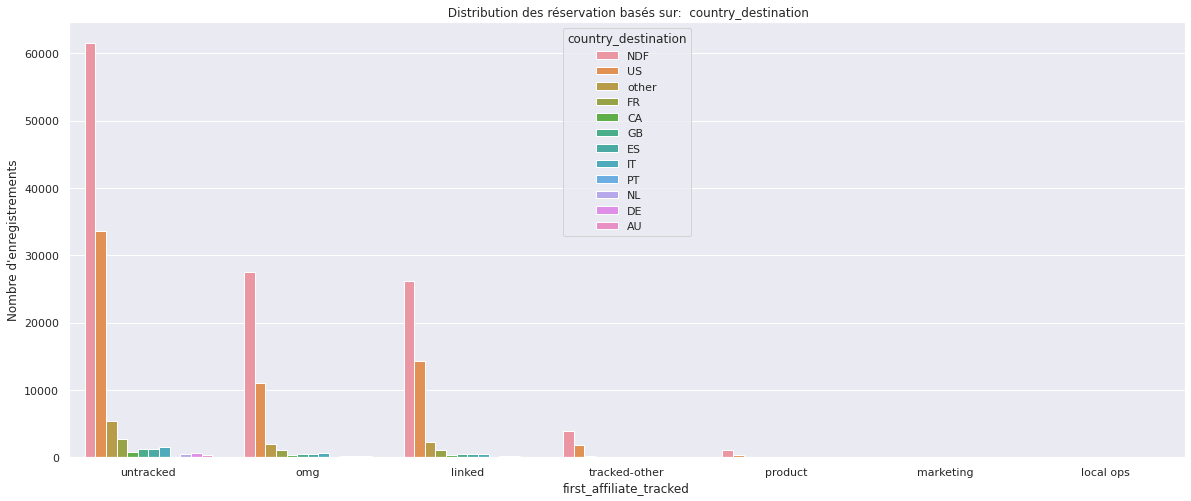

In [25]:
# Appel de la fonction plot_bar et tracer le diagramme de bar pour les descripteur country_destination / first_affiliate_tracked
plot_bar(df_manip, 'country_destination', 'first_affiliate_tracked')

first_affiliate_tracked: quel est le premier marketing avec lequel l'utilisateur a interagi avant l'inscription

On remarque que la plus part des résultats sont 'untracked'

#### affiliate_channel

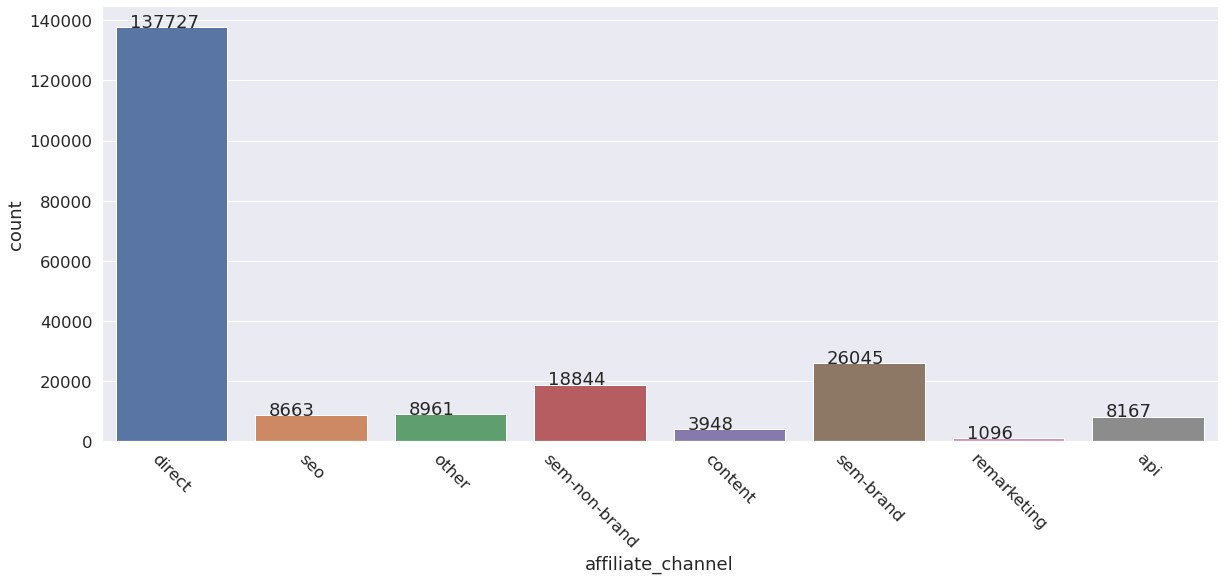

In [26]:
ax = sns.countplot(x='affiliate_channel', data=df_manip)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=-45)
plt.rcParams["figure.figsize"] = (20,8)
plt.show()

affiliate_channel: quel type de marketing payant

On remarque que la plupart des demandes sont passés directement par le site web (direct), et les autres demandes de réservation sont motivées par des intermediere (exemple des influenceur ou de re marketing, ..., etc)

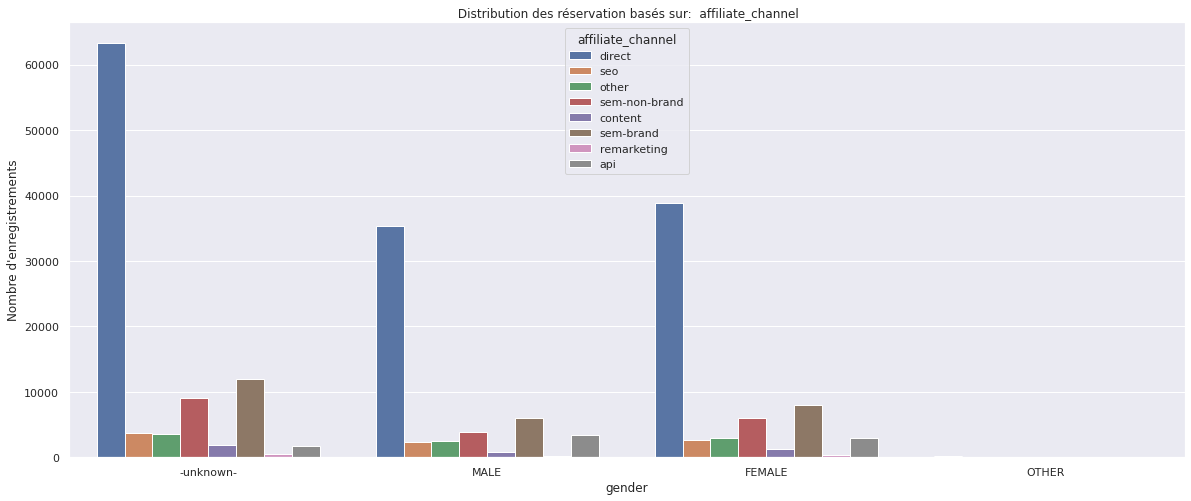

In [27]:
# Appel de la fonction plot_bar eon remarque qu'il n'y a pas de  biais dans les demandes de réservation entre les femmes et les hommes selon le type de affiliate_channelt tracer le diagramme de bar pour les descripteur affiliate_channel / gender
plot_bar(df_manip, 'affiliate_channel', 'gender')

On remarque qu'il n'y a pas de  biais dans les demandes de réservation entre les femmes et les hommes selon le type de affiliate_channel

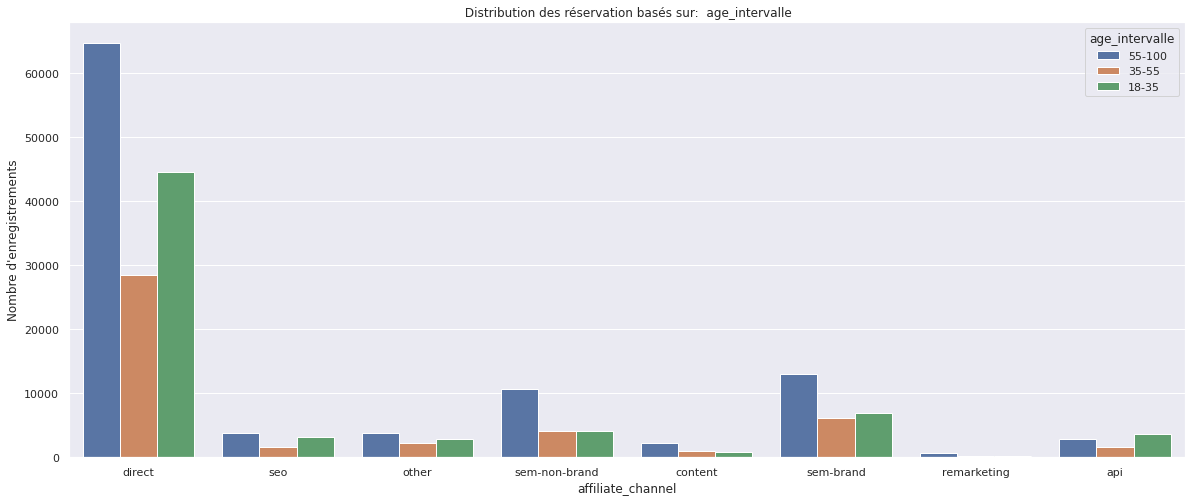

In [28]:
# Appel de la fonction plot_bar et tracer le diagramme de bar pour les descripteur affiliate_channel / age_intervalle
plot_bar(df_manip, 'age_intervalle', 'affiliate_channel')

Dans les tranches d'âge, nous remarquons que la plupart préfèrent la réservation directe via le site Web. Mais on remarque que les jeunes (18-15 ans) passent plus par les API que les 2 autres groupes d'âge.

In [29]:
# Fonction box-plot
def box_plot(x, y, hue, df):
    plt.figure(figsize=(15, 5))
    sns.boxplot(x, y, hue, palette="Set3", width=0.6,  
                fliersize=4, data= df)
    plt.ylim(10, 150)
    plt.legend(loc='lower right')
    # placer la légende en dehors de la figure (hue='gender')
    plt.legend(bbox_to_anchor=(1.02, 1),borderaxespad=0)
    plt.show()

Dans l'EDA, nous remarquons que la plupart des descripteurs sont catégoriques. La présence de valeurs manquantes et juste dans 3 descripteurs (date_first_booking, age,  first_affiliate_tracked), de plus on constate que le descripteur «âge» contient plus de valeurs aberrantes. et nous remarquons également que les données sont déséquilibrées avec plus de réservation au distination NDF. Les femmes ont la tendance à faire des réservations plus que les hommes. Les réservations se font généralement directement sans passer par aucune promotion intermédiaire. Au final, la dépendence entre les descripteurs n'est pas forte.

#### Relation entre 'country_destination', 'age', 'gender'

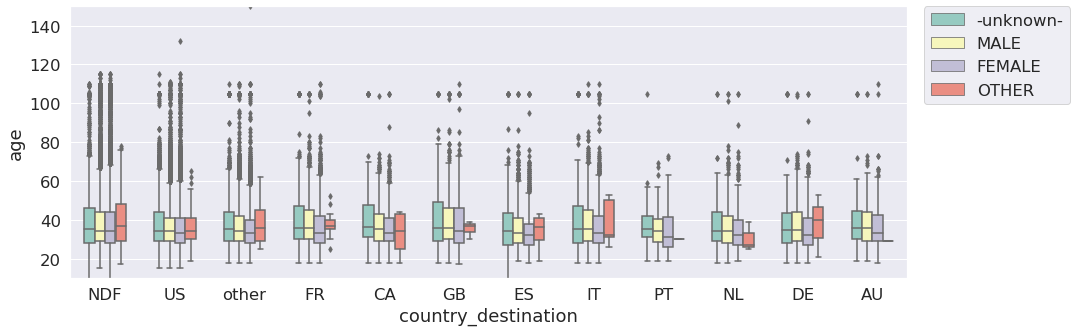

In [30]:
# relation entre 'country_destination', 'age', 'gender'
box_plot(x='country_destination', y='age', hue='gender', df=df_manip)

Nous remarquons la présence de valeurs aberrantes au niveau de l'âge dans toutes les demandes de réservation quel que soit le sexe

#### Relation entre 'annee', 'age', 'gender'

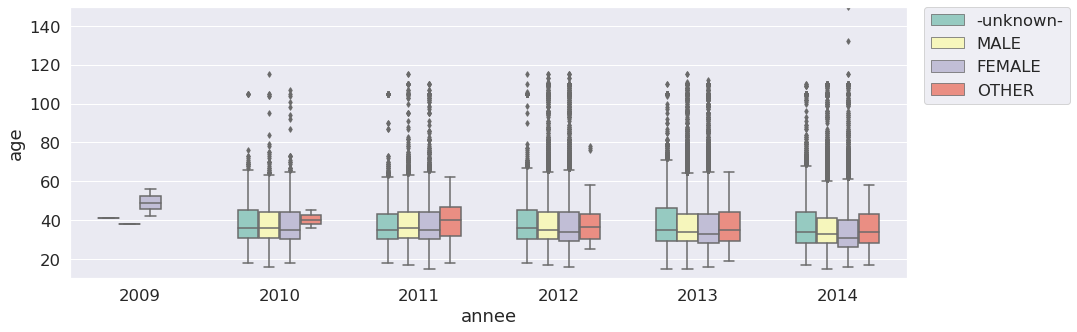

In [31]:
# relation entre 'annee', 'age', 'gender'
box_plot(x='annee', y='age', hue='gender', df=df_manip)

Dans le type de sexe other, on remarque l'absence de valeurs aberrantes (age) dans presque toutes les années.

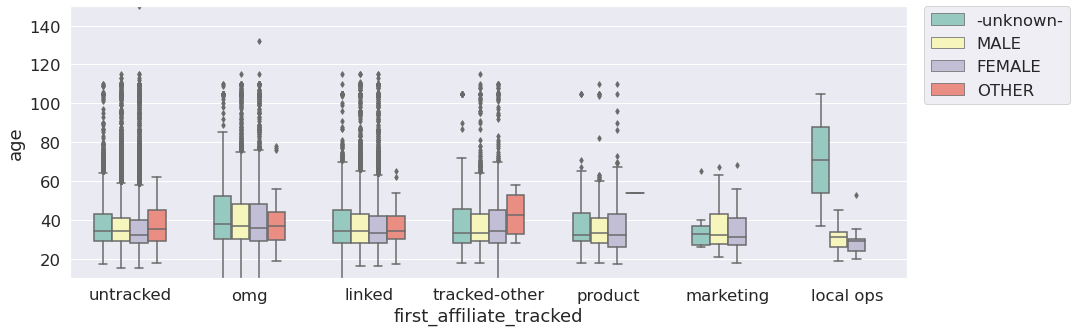

In [32]:
# relation entre 'language', 'age', 'gender'
box_plot(x='first_affiliate_tracked', y='age', hue='gender', df=df_manip)

Le boxplot de l'age nous indique qu'il y a des valeurs aberrantes.

#### Scatterplot pour les variables numériques

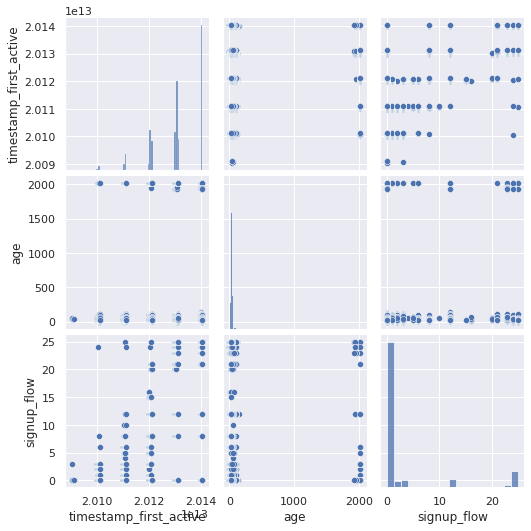

In [33]:
# scatterplot pour les variables numeriques
sns.set()
cols = df_train.columns
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

Ces nuages de points nous donnent une idée sur les relations entres les variables numériques. On remarque qu'il n' existe aucune relation linéaire entre les variables numériques. Cela conclut qu'il n'y a aucune corrélation entre les variables. On confirmera cette hypothèses dans la section suivante avec la matrice de corrélation.

### 6) Corrélation (Variables Numériques)

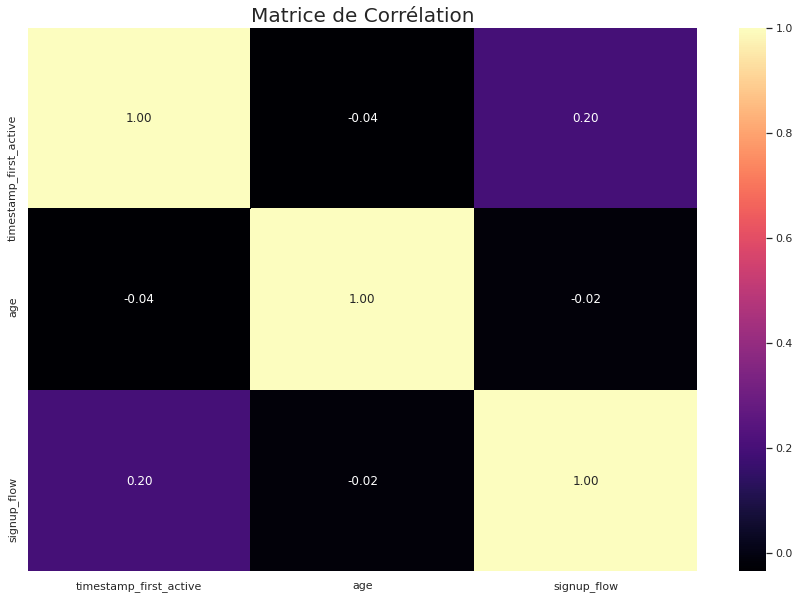

In [34]:
# Matrice de corrélation
num_cols = df_train.columns
f, ax = plt.subplots(figsize= [15,10])
sns.heatmap(df_train[num_cols].corr(), annot=True, fmt=".2f", ax=ax, cmap = "magma" )
ax.set_title("Matrice de Corrélation", fontsize=20)
plt.show()

Comme le montre la figure, il n'y a pas de corrélation significative entre les variables numériques.

### 7) Générer un rapport de profil

In [35]:
# profile_report
import pandas_profiling

profile = df_train.profile_report(title ='Pandas Profiling Report')
profile.to_file(output_file="rapport.html")

## 8) Conclusion

Dans l'EDA, nous remarquons que la plupart des descripteurs sont catégoriques. La présence de valeurs manquantes sont présentes dans les 3 descripteurs (date_first_booking, age,  first_affiliate_tracked). De plus, on constate que le descripteur «âge» contient plus de valeurs aberrantes et nous remarquons également que les données sont déséquilibrées avec plus de réservation au destination NDF. Les femmes ont tendance à faire des réservations plus que les hommes. Les réservations se font généralement directement sans passer par aucune promotion intermédiaire. Au final, la dépendance entre les descripteurs n'est pas forte.